## Econ 430
### UCLA, Master of Quantitative Economics
#### Dr. Randall R. Rojas

# Ordinary Least Squares

## 1) Inspect the data

In [2]:
# Load Modules and Functions
import statsmodels.api as sm
import statsmodels as sms
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wooldridge as woo

# Load the data:
df = woo.dataWoo('wage1')

# Check the data object type
print(type(df))

# Look at the data 
print(df.head())

# Statistical summary of the data
print(df.describe())
# Q: Which indicator variables might be problematic? Why?

# Check the variables' types
print(df.info())

# Look for any missing observations
print(df.isnull().any())

# Extra sanity check, count the number of many missing obs per variable (if any)
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
   wage  educ  exper  tenure  nonwhite  female  married  numdep  smsa  \
0  3.10    11      2       0         0       1        0       2     1   
1  3.24    12     22       2         0       1        1       3     1   
2  3.00    11      2       0         0       0        0       2     0   
3  6.00     8     44      28         0       0        1       0     1   
4  5.30    12      7       2         0       0        1       1     0   

   northcen  ...  trcommpu  trade  services  profserv  profocc  clerocc  \
0         0  ...         0      0         0         0        0        0   
1         0  ...         0      0         1         0        0        0   
2         0  ...         0      1         0         0        0        0   
3         0  ...         0      0         0         0        0        1   
4         0  ...         0      0         0         0        0        0   

   servocc     lwage  expersq  tenursq  
0        0  1.131402        4  

In [3]:
print(df.isnull().sum())

wage        0
educ        0
exper       0
tenure      0
nonwhite    0
female      0
married     0
numdep      0
smsa        0
northcen    0
south       0
west        0
construc    0
ndurman     0
trcommpu    0
trade       0
services    0
profserv    0
profocc     0
clerocc     0
servocc     0
lwage       0
expersq     0
tenursq     0
dtype: int64


In [4]:
print(df.isnull().any())

wage        False
educ        False
exper       False
tenure      False
nonwhite    False
female      False
married     False
numdep      False
smsa        False
northcen    False
south       False
west        False
construc    False
ndurman     False
trcommpu    False
trade       False
services    False
profserv    False
profocc     False
clerocc     False
servocc     False
lwage       False
expersq     False
tenursq     False
dtype: bool


In [5]:
df.isnull()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
522,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
523,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
524,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 2) Look at the distributions of the variables

D:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\lib\site-package

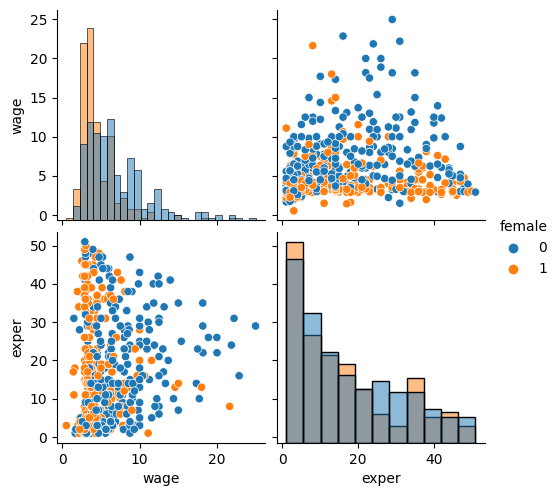

In [6]:
sns.pairplot(df,vars=['wage', 'exper'],hue="female", diag_kind="hist")
# For the PDF, just leave out diag_kind"

## 3) Fit the OLS Model

In [7]:
# Specify the Model
ols_mod = smf.ols(formula='wage ~ exper', data=df)

# Fit the Model
ols_fit = ols_mod.fit()
# Type: dir(ols_fit) to look at other accessible attributes

# Look at the Model Fit Summary
print(ols_fit.summary())


                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.766
Date:                Sun, 29 Oct 2023   Prob (F-statistic):            0.00955
Time:                        15:05:31   Log-Likelihood:                -1429.7
No. Observations:                 526   AIC:                             2863.
Df Residuals:                     524   BIC:                             2872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3733      0.257     20.908      0.0

D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
D:\Anaconda\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


## 4) Evaluate the Model

In [8]:
import statsmodels.stats.api as sms
from simple_colors import *
# Linearity: Harvey-Collier --> Ho: model is linear
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(ols_fit)
print(blue("Linearity Test Results:",['bold']))
print(list(zip(name, test)))
print("\n")

# Normaility of the Residuals: Jarque-Bera --> Residuals ~ N(0,1)
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(ols_fit.resid)
print(blue("JB Results:",['bold']))
print(list(zip(name, test)))
print("\n")

# Heteroskedasticity: Breush-Pagan --> Ho: var = constant
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(ols_fit.resid, ols_fit.model.exog)
print(blue("BP Results:",['bold']))
print(list(zip(name, test)))

Linearity Test Results:
[('t-stat', -3.2525062855138223), ('p-value', 0.0012178806000892786)]


JB Results:
[('Jarque-Bera', 851.5424757340136), ('Chi^2 two-tail prob.', 1.2299879060934629e-185), ('Skew', 1.962381539797588), ('Kurtosis', 7.8425080125868005)]


BP Results:
[('Lagrange multiplier statistic', 5.73647968384148), ('p-value', 0.016616063038612978), ('f-value', 5.777678497439664), ('f p-value', 0.016577290872715044)]


## 5) Look at the diagnostic plots

eval_env: 1


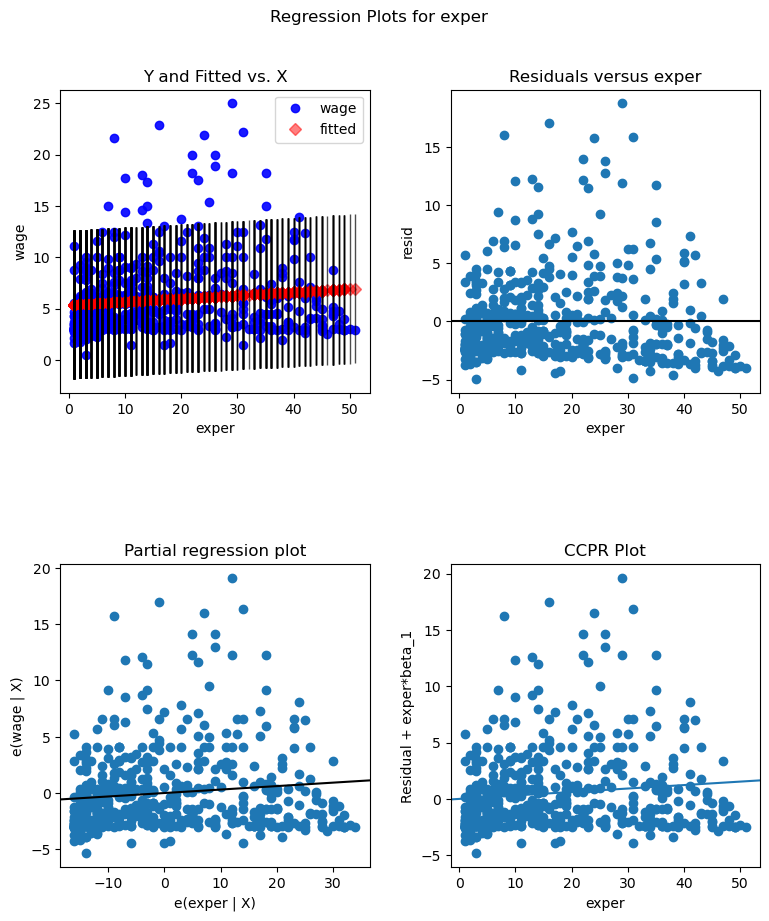

In [8]:
figD = sm.graphics.plot_regress_exog(ols_fit, "exper")
figD.set_figheight(10)
figD.set_figwidth(8)
plt.show()

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Residuals')]

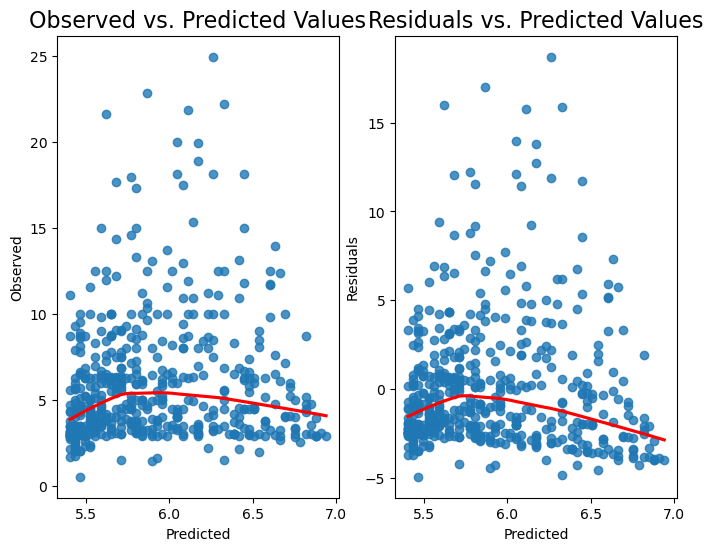

In [9]:
import seaborn as sns 

fig, ax = plt.subplots(1,2,figsize=(8, 6))
sns.regplot(x=ols_fit.fittedvalues, y=df['wage'], lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=ols_fit.fittedvalues, y=ols_fit.resid, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

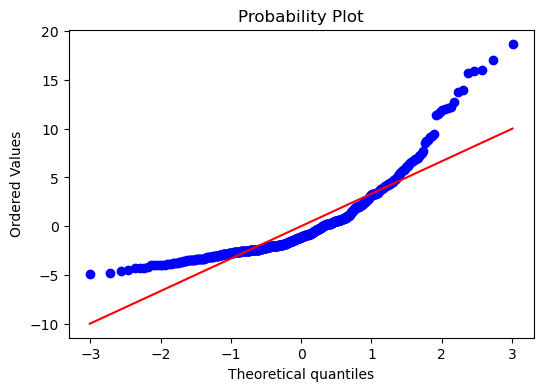

In [10]:
# QQ Plot (Normal Probability) 
import scipy as sp
figA, axA = plt.subplots(figsize=(6,4))
_, (__, ___, r) = sp.stats.probplot(ols_fit.resid, plot = axA, fit=True)

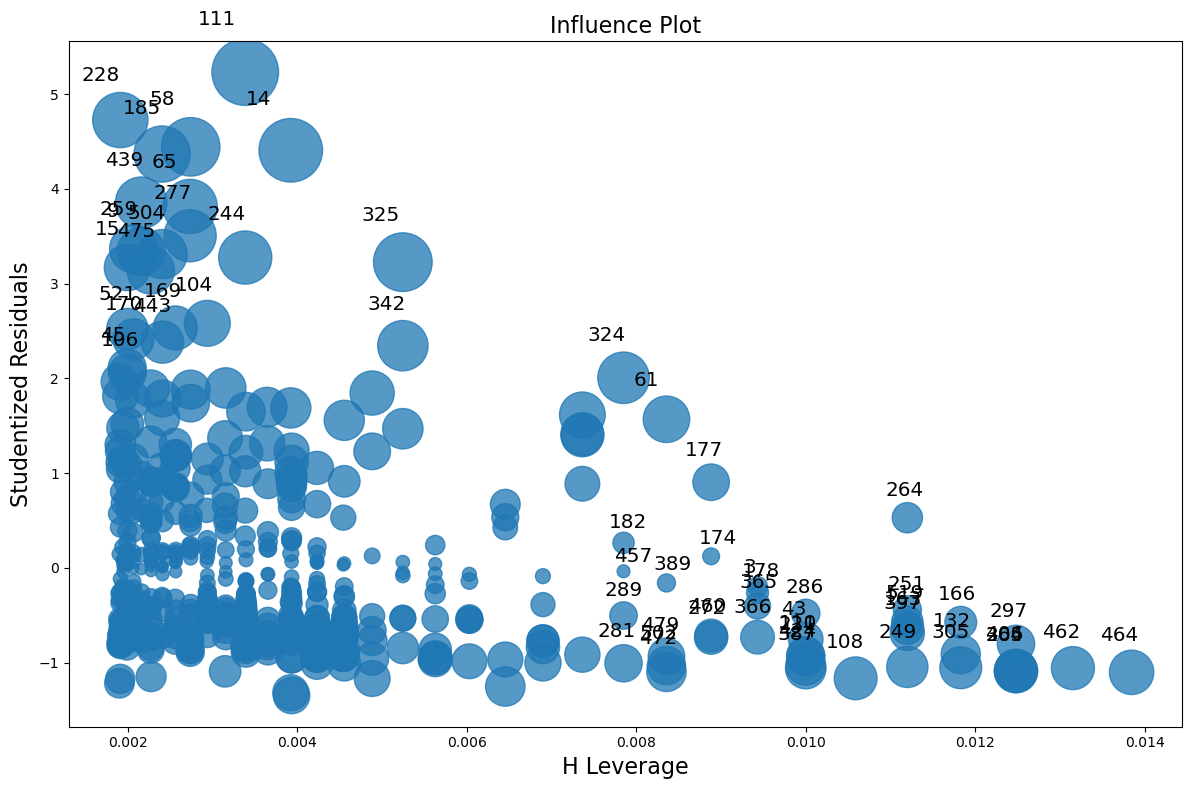

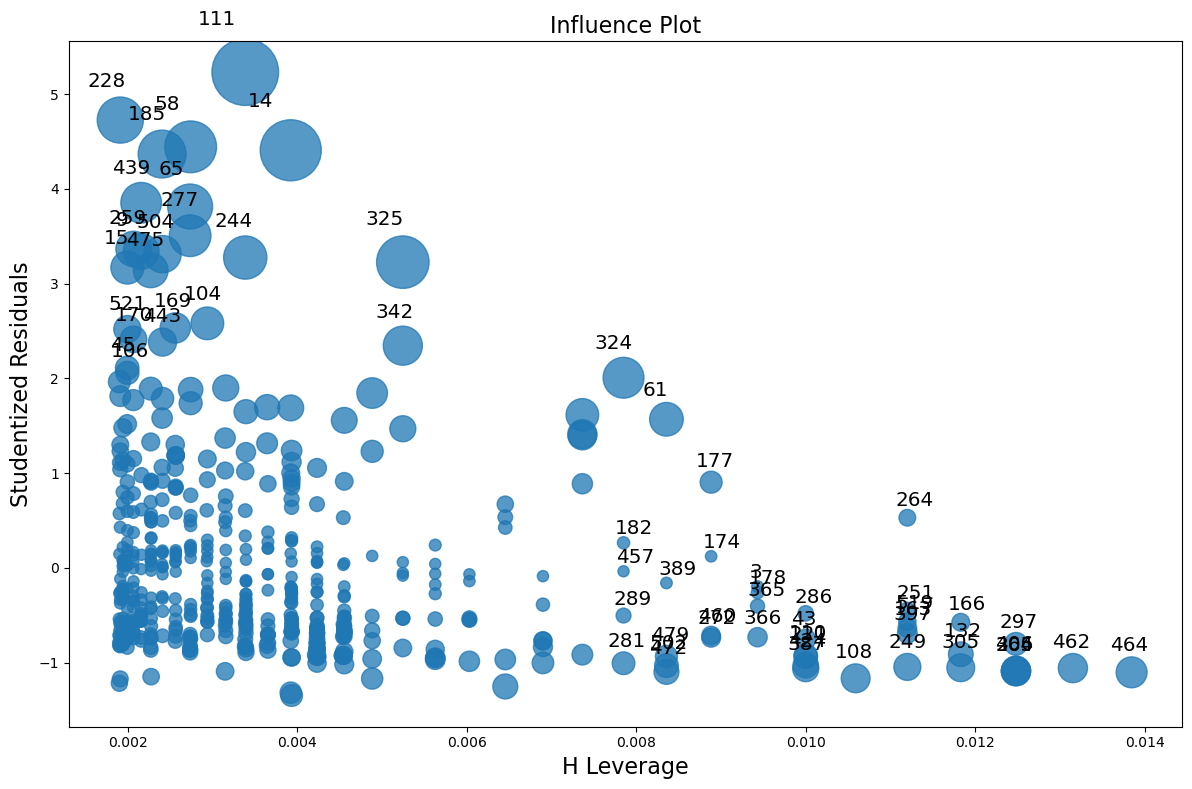

In [11]:
# Outliers, high leverage, influential obs
figd, ax = plt.subplots(figsize=(12,8))
figd = sm.graphics.influence_plot(ols_fit, ax = ax, criterion="DFFITS")
figd.tight_layout(pad=1.0)

fige, ax = plt.subplots(figsize=(12,8))
fige = sm.graphics.influence_plot(ols_fit, ax = ax, criterion="cooks")
fige.tight_layout(pad=1.0)


# R Version (Plot) of the Residuals Analysis

The code below sets the environment for R syntax so that we can directly use the R libbraries and respective funcntions of interest.

In [10]:
#library to use R in Python 
import rpy2

import warnings
warnings.filterwarnings('ignore')

from rpy2.robjects import pandas2ri
import rpy2.rinterface as rinterface
pandas2ri.activate()

%load_ext rpy2.ipython

In [1]:
pip install rpy2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



载入程辑包：'olsrr'

The following object is masked from 'package:wooldridge':

    cement

The following object is masked from 'package:datasets':

    rivers

In addition: Warning message:
程辑包'olsrr'是用R版本4.1.3 来建造的 


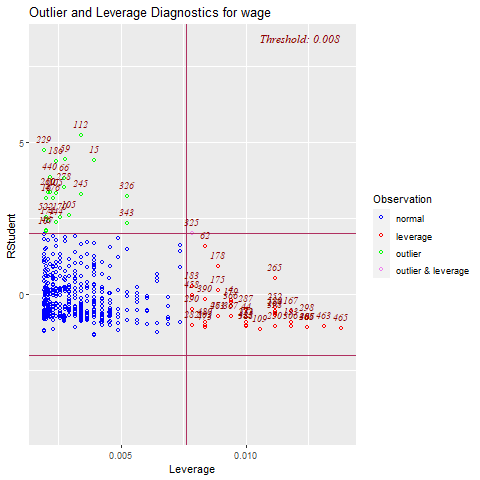

In [11]:
%%R 
# Look  at the data

library(wooldridge)
library(olsrr)
mreg.mod= lm(wage ~ exper,data = wage1)
ols_plot_resid_lev(mreg.mod)

-0.21012363603670142


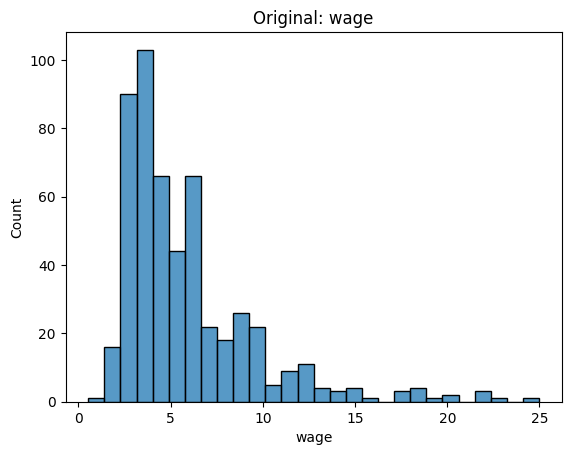

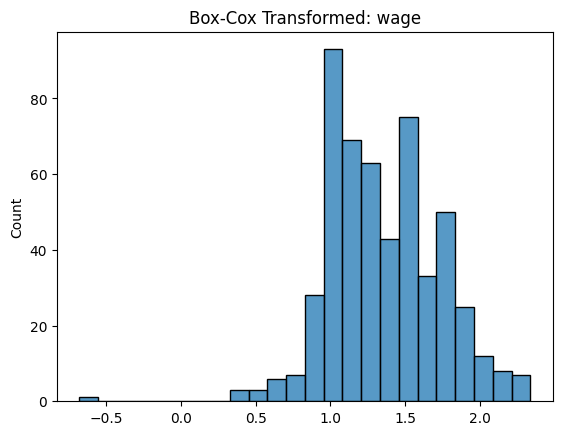

0.30455181084484656


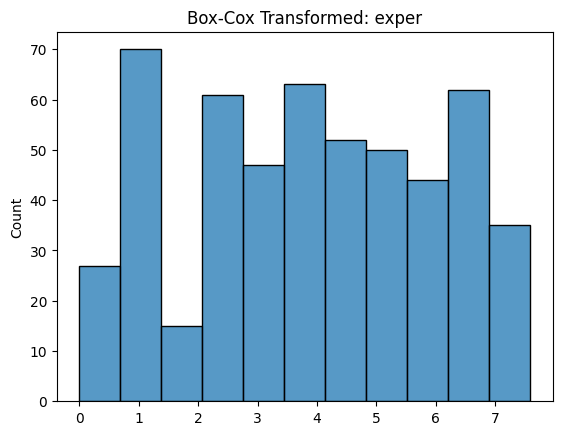

In [12]:
# Box-Cox Transformations
import scipy
bc_wage,lambda_wage = scipy.stats.boxcox(df["wage"])
print(lambda_wage)

sns.histplot(df["wage"])
plt.title("Original: wage")
plt.show()

sns.histplot(bc_wage)
plt.title("Box-Cox Transformed: wage")
plt.show()

bc_exper,lambda_exper = scipy.stats.boxcox(df["exper"])
print(lambda_exper)

sns.histplot(bc_exper)
plt.title("Box-Cox Transformed: exper")
plt.show()

## 6) Examine the Bootstrap estimates

The script below is an adaptation from [towards data science](https://towardsdatascience.com/linear-regression-with-bootstrapping-4924c05d2a9).

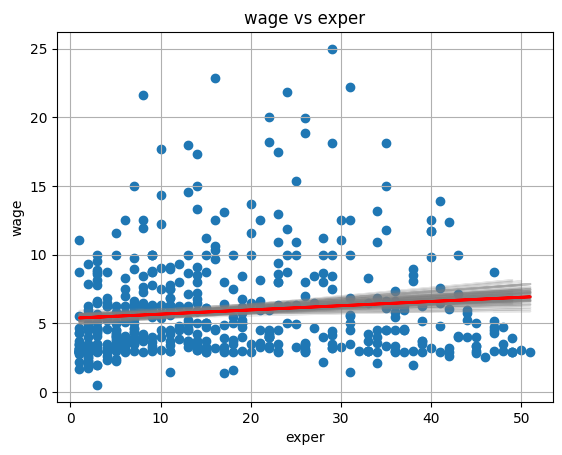

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm
import wooldridge as woo

# Load the data:
df = woo.dataWoo('wage1')

# resample with replacement each row
boot_slopes = []
boot_interc = []
boot_adjR2 = []
n_boots = 100
n_points = df.shape[0]
plt.figure()
for _ in range(n_boots):
 # sample the rows, same size, with replacement
    sample_df = df.sample(n=n_points, replace=True)
 # fit a linear regression
    ols_model_temp = sm.ols(formula = 'wage ~ exper', data=sample_df)
    results_temp = ols_model_temp.fit()
 
 # append coefficients
    boot_interc.append(results_temp.params[0])
    boot_slopes.append(results_temp.params[1])
    boot_adjR2.append(results_temp.rsquared_adj)
 
 # plot a greyed out line
    y_pred_temp = ols_model_temp.fit().predict(sample_df['exper'])
    plt.plot(sample_df['exper'], y_pred_temp, color='grey', alpha=0.2)
# add data points
y_pred = ols_mod.fit().predict(df['exper'])
plt.scatter(df['exper'], df['wage'])
plt.plot(df['exper'], y_pred, linewidth=2,color = 'red')
plt.grid(True)
plt.xlabel('exper')
plt.ylabel('wage')
plt.title('wage vs exper')
plt.show()

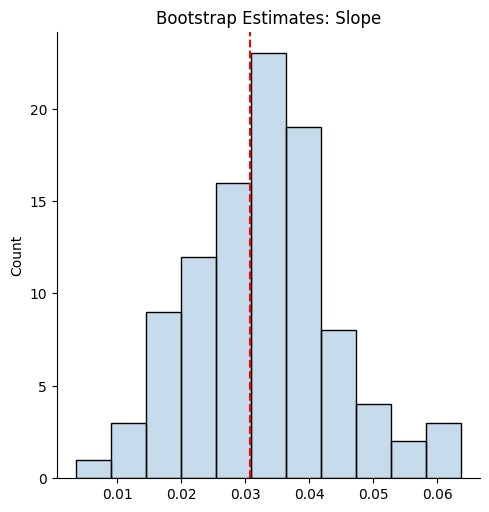

In [14]:
sns.displot(boot_slopes, alpha = 0.25)
plt.axvline(x=0.0307,color='red', linestyle='--')
plt.title('Bootstrap Estimates: Slope')
plt.show()

# The vertical red line = LS estimate

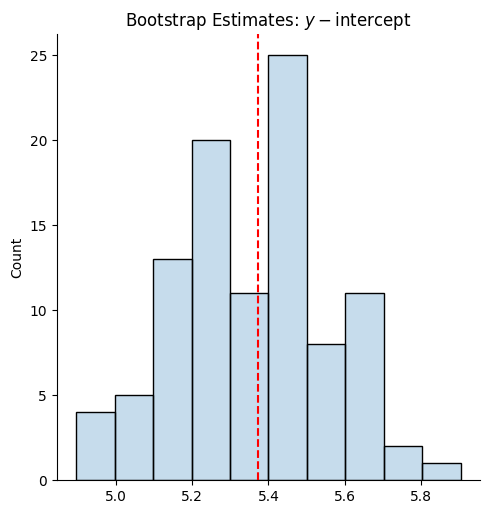

In [15]:
sns.displot(boot_interc, alpha = 0.25)
plt.axvline(x=5.3733,color='red', linestyle='--')
plt.title('Bootstrap Estimates: $y-$intercept')
plt.show()
# The vertical red line = LS estimate

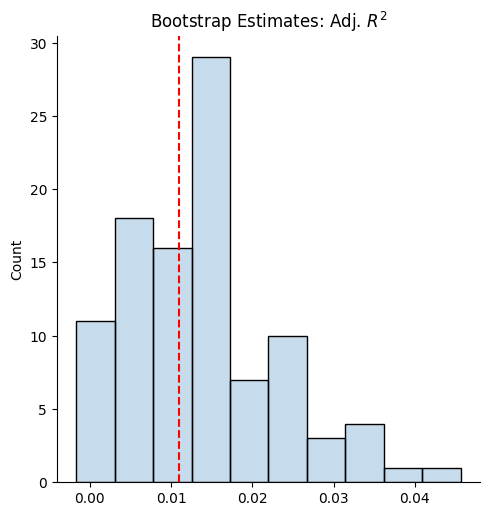

In [16]:
sns.displot(boot_adjR2, alpha = 0.25)
plt.axvline(x=0.011,color='red', linestyle='--')
plt.title('Bootstrap Estimates: Adj. $R^2$')
plt.show()

# The vertical red line = LS estimate

## Note: Clluen-Frey Graph

You will need to install the `fitter` package first (`pip install fitter`), and although the output is not identical to the one from the lecture notes, this package works quite well. Keep in mind that it may take a couple of minutes to run.

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED johnsonsu distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED ksone distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED norminvgauss distribution (taking more than 30 seconds)
SKIPPED powerlognorm distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)
SKIPPED triang distribution (taking more than 30 seconds)
SKIPPED truncweibull_min distribution (taking more than 30 seconds)
SKIPPED tukeylambda distribution (taking more than 30 seconds)
SKIPPED weibull_max distribution

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gausshyper,0.026120,786.078704,815.525235,inf,0.012973,0.995268
weibull_min,0.026131,782.082273,796.805539,inf,0.010825,0.999738
burr12,0.026146,780.074803,799.705824,inf,0.012844,0.995858
exponweib,0.026156,780.586226,800.217247,inf,0.013241,0.993844
beta,0.026531,780.109208,799.740229,inf,0.016085,0.954435


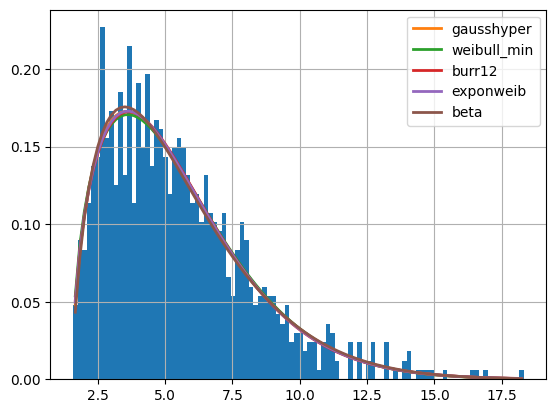

In [17]:
# Generate some data:
from scipy import stats
data = stats.gamma.rvs(2, loc=1.5, scale=2, size=1000)

# Fit various distributions:
from fitter import Fitter
f = Fitter(data)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

## 7) Evaluate the model performance using Cross-Validation

We will use the [Scikit-Learn](https://scikit-learn.org/stable/) package.

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

x = df[['exper']]
y = df[['wage']]
# Perform an OLS fit using all the data
regr = LinearRegression()
model = regr.fit(x,y)
regr.coef_
regr.intercept_

# Split the data into train  (70%)/test(30%) samples:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Train the model:
regr = LinearRegression()
regr.fit(x_train, y_train)

# Make predictions based on the test sample
y_pred = regr.predict(x_test)

# Evaluate Performance

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Perform a 5-fold CV
# Use MSE as the scoring function (there are other options as shown here:
# https://scikit-learn.org/stable/modules/model_evaluation.html

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, x, y, cv=5, scoring='neg_root_mean_squared_error')
print('5-Fold CV RMSE Scores:', scores)

MAE: 2.669962398476693
MSE: 12.059234726999012
RMSE: 3.4726408865586738
5-Fold CV RMSE Scores: [-4.3982781  -3.8027313  -3.5078229  -2.95388475 -3.7262548 ]
